In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

font = {'family' : 'monospace',
        #'weight' : 'bold',
        'size'   : 20}
plt.rc('figure', figsize=(16,9))
plt.rc('font', **font)  # pass in the font dict as kwargs
plt.rc('lines', lw=2)

## Problema 2

In [2]:
N = 10
x = 0.5
e= 0

for n in range(N):
    e += (x**n)/np.math.factorial(n)
    print(e)

    

1.0
1.5
1.625
1.6458333333333333
1.6484375
1.6486979166666667
1.6487196180555554
1.6487211681547618
1.6487212650359622
1.648721270418251


## Problema 3

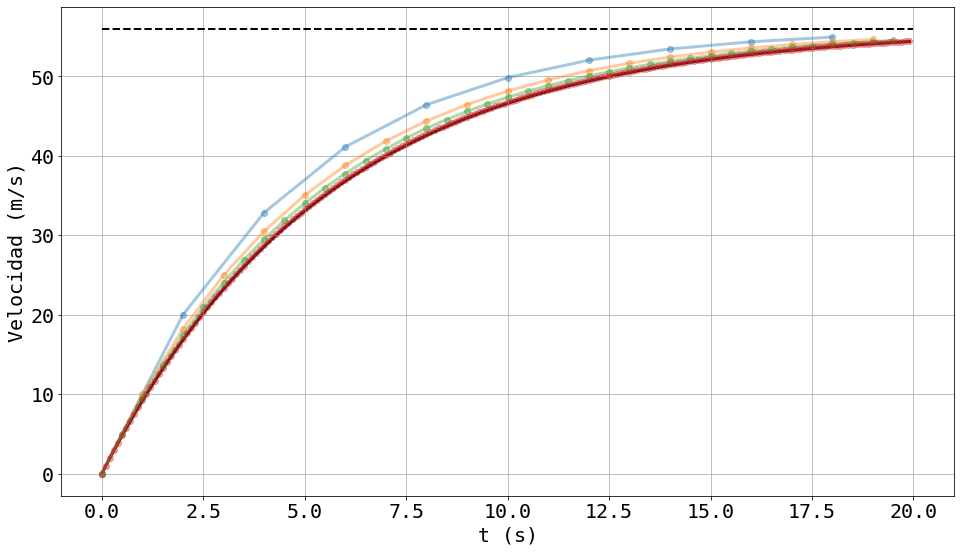

In [8]:
m = 70 #kg
gamma = 12.5 #kg/seg
g = 10 #m/s2
deltaT = [2, 1, 0.5, 0.1 ]
tf = 20
vlim = g*m/gamma
plt.figure(figsize=(16,9))
plt.xlabel('t (s)')
plt.ylabel('Velocidad (m/s)') 
plt.hlines(vlim, 0, tf, color='k', linestyles='dashed')
plt.grid(True)
for dt in deltaT:
    t = np.arange(0,tf, dt)
    v = np.zeros(len(t))
    v_analitica = g*m/gamma*(1-np.exp(-(gamma/m)*t))
    for i in range(len(t)):
        if i ==0:
            v[i] = 0
        else:
            v[i] = v[i-1] + (g - gamma/m*v[i-1])*dt

    plt.plot(t, v, 'o-',linewidth= 3, alpha=0.4)

plt.plot(t, v_analitica, 'k', linewidth=3, zorder=-1)

## Problema 4

In [4]:
A = np.array([[1,-3,-2], [2,-4,-3], [-3,6,8]])
b = np.array([6,8,-5])

x = np.linalg.solve(A,b)
x

array([ 1., -3.,  2.])

## Problema 5

$$
J = -k\frac{dT}{dz}
$$

In [9]:
k = 0.01 #cal/(s cm �C)
z = np.array([0, 0.5, 1., 1.5, 2.0, 2.5, 3.])
T = np.array([70, 68, 55, 22, 13, 11, 10])
N = len(z)

h = [z[i+1]-z[i] for i in range(N-1)]
A = np.eye(N)
y = np.zeros((N,1))
for i in range(1, N-1):
    A[i,i] = 2*(h[i]+h[i-1])
    A[i,i-1] = h[i-1]
    A[i,i+1] = h[i]
    y[i] = 3*(T[i+1]-T[i])/h[i] - (T[i]-T[i-1])/h[i-1]
    
b = np.linalg.solve(A,y)

d = T
c = np.zeros((N,1))
a = np.zeros((N,1))
for i in range(N-1):
    a[i] = 1/3*(b[i+1]-b[i])/h[i]
    c[i] = ((d[i+1]-d[i])/h[i])- b[i]*h[i] - a[i]*h[i]**2 

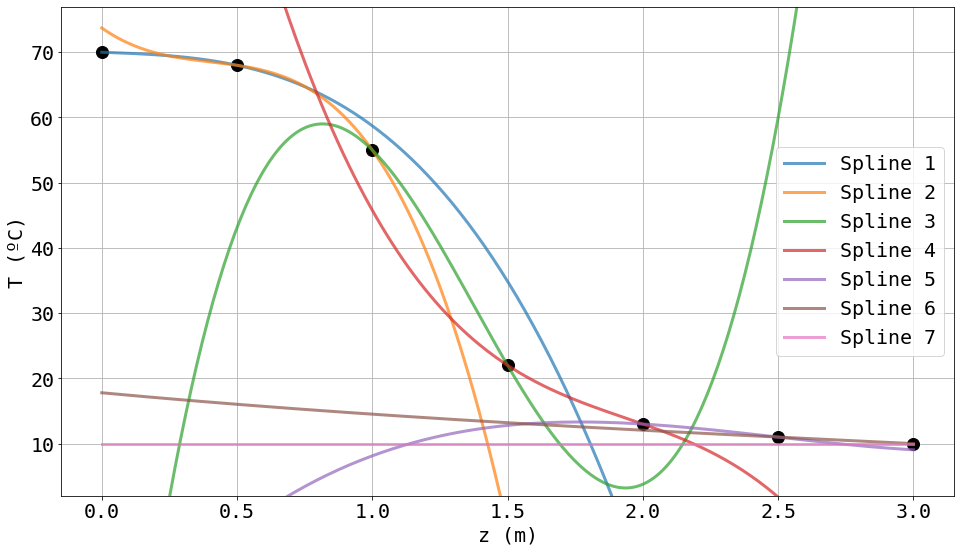

In [10]:
plt.plot(z, T, 'ok', lw=4, markersize=12)

for i in range(N):
    z_ext = np.linspace(min(z), max(z), 300)
    f = d[i] + c[i]*(z_ext-z[i]) + b[i]*(z_ext-z[i])**2 + a[i]*(z_ext-z[i])**3
    plt.plot(z_ext, f, alpha=0.7, label= 'Spline {}'.format(i+1), lw=3)

plt.ylim([min(T)*0.2,max(T)*1.1])
plt.legend()
plt.ylabel('T (ºC)')
plt.xlabel('z (m)')
plt.grid(True)

## Problema 7

No puedo encontrar el problema en Simpson

In [12]:

a = 0
b = 30
n = 51
dz = b/n
# h = (b - a) / (n - 1)
z = np.linspace(a, b, n)
# print(z)
# z = np.arange(a, b, )
f = 200 * (z/(5+z))*np.exp(-2*z/30)

#el t�rmino (b-a)/2 en nuestro caso es n que es el intervalo que utilizo 
#como base de mi trapecio o de mi caudradu

I_sq = np.sum(dz*f)
I_trap = dz*(2*np.sum(f) - (f[0] + f[-1]))/2
I = np.trapz(f, dx=dz)
#list2 = [x for ind, x in enumerate(list1) if 4 > ind > 0]

sum_even = np.sum([even for i, even in enumerate(f) if (i%2==0) & (i>0)])
sum_odd = np.sum([odd for i, odd in enumerate(f) if (i%2==1) & (i<(b-1))])

I_simpson = ((b-a)/(n-1))* (f[0] + 4*sum_even + 2*sum_odd + f[-1])*(1/3)
print('Integracion "simple": ', I_sq)
print('Integracion trapecios', I_trap)
print('Integracion simpson', I_simpson)
print('Integracion numpy: ',I)
# print('Integracion scipy: ', integrate(f, ))
# I_trap = ((b-a)/)*(f[0] + 2 * sum(f[1:n-1]) + f[n-1])

# plt.figure(figsize=(16,9))
# plt.plot(z,f, 'o')

Integracion "simple":  1457.1449788103423
Integracion trapecios 1450.321351084126
Integracion simpson 1336.5249054646515
Integracion numpy:  1450.3213510841263


## Problema 8

$$
\frac{\delta y}{\delta x} = 4e^{0.8x} - 0.5y  
$$

$$
\frac{\delta y}{\delta x} = F(x,y) = 4e^{0.8x} - 0.5y  
$$


### Euler

$$ 
y_{i+1}^{0} = y_i + f(t_i, y_i)h
$$

### Heun

$$
y_{i+1/2} = y_i + f(t_i, y_i)\frac{h}{2}
$$

$$
y_{i+1} = y_i + f(t_{i+1/2}, y_{i+1/2})h
$$

In [15]:
def F(x, y):
    """Ecuación diferencial"""
    return 4*np.exp(0.8*x)-0.5*y

def F_teorico(x):
    return (4/1.3) * (np.exp(0.8*x)-np.exp(-0.5*x)) + 2*np.exp(-0.5*x)

def paso_euler(dx, xo, yo, F):
    
    return yo + F(xo, yo)*dx

def paso_heun(dx, xo, yo, F):
    y_half = yo + F(xo, yo)*(dx/2)
    y = yo + F(xo+dx/2, yo)*dx
    return y

def RK(dx, xo, yo, F):
    k1 = F(xo, yo)
    k2 = F(xo + 0.5*dx, yo + 0.5*k1*dx)
    k3 = F(xo + 0.5*dx, yo + 0.5*k2*dx)
    k4 = F(xo +     dx, yo +     k3*dx)
    y = yo + (1/6)*(k1+2*k2+2*k3+k4)* dx
    return y

def dfsolve(N, method, xo=0, xf=4, yo=2, F=F):
    x = np.linspace(xo, xf, N+1)
    dx = (xf - xo)/N
    y = [yo]
    
    for i, xi in enumerate(x[:-1]):
        y.append(method(dx, xi, y[-1], F))
    
    return x, y

def error(y_teorico, y_numerico):
    return np.sum(abs((y_teorico-y_numerico)/y_teorico))
    
 


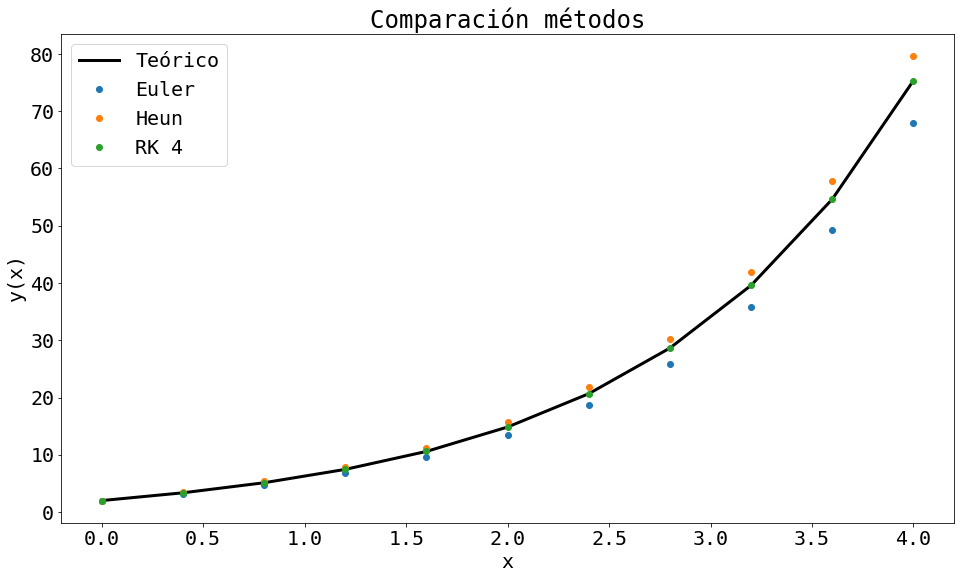

In [20]:
N = 10
xe, ye = dfsolve(N, method = paso_euler)
xh, yh = dfsolve(N, method = paso_heun)
xrk, yrk = dfsolve(N, method = RK)


y_teorico = F_teorico(xrk)

plt.plot(xrk, y_teorico, 'k', lw=3, label='Teórico')
plt.plot(xe, ye, 'o', label= 'Euler')
plt.plot(xh, yh, 'o', label= 'Heun')
plt.plot(xrk, yrk, 'o', label='RK 4')
plt.ylabel('y(x)')
plt.xlabel('x')
plt.title('Comparación métodos')
plt.legend()


In [ ]:
muestras = np.logspace(1, 5, 20).astype(int)
# print(muestras)
e_e = []
e_h = []
e_rk = []
for N in muestras:
    xe, ye = dfsolve(N, method = paso_euler)
    xh, yh = dfsolve(N, method = paso_heun)
    xrk, yrk = dfsolve(N, method = RK)
    y_teorico = F_teorico(xrk)
    
    e_e.append(error(y_teorico, ye))
    e_h.append(error(y_teorico, yh))
    e_rk.append(error(y_teorico, yrk))

    
# for e in [e_e, e_h, e_rk]:
#     plt.loglog(muestras, np.array(e), '-o')

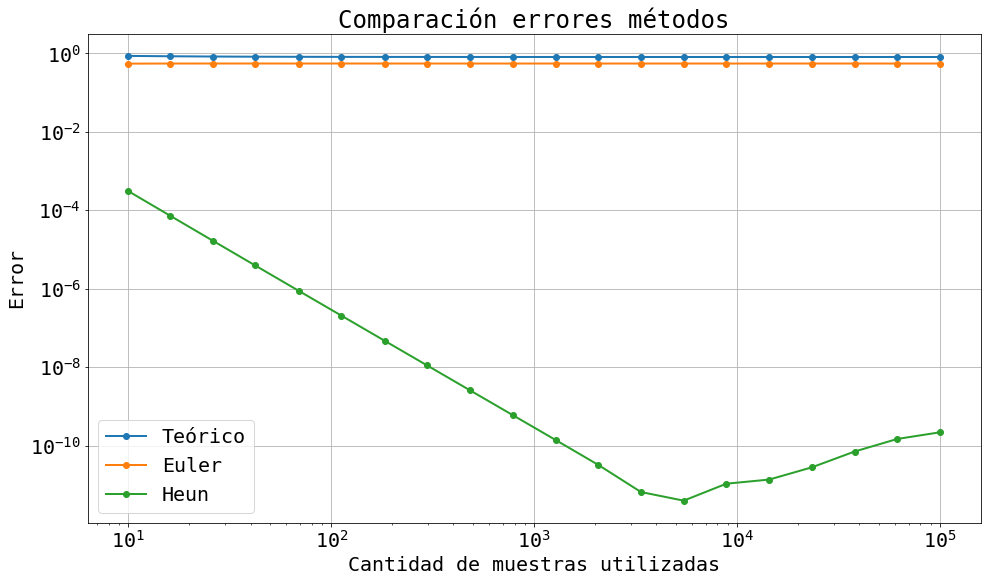

In [21]:
plt.loglog(muestras, e_e, 'o-', label='Teórico')
plt.loglog(muestras, e_h, 'o-', label= 'Euler')
plt.loglog(muestras, e_rk, 'o-', label= 'Heun')
plt.title('Comparación errores métodos')
plt.xlabel('Cantidad de muestras utilizadas')
plt.ylabel('Error')
plt.grid(True)
plt.legend()

    